In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import yfinance as yfin
from scipy.stats import norm
%matplotlib inline

In [3]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = yfin.download(ticker, start='2007-1-1')['Adj Close']

[*********************100%%**********************]  1 of 1 completed


In [4]:
log_returns = np.log(1 + data.pct_change())

In [5]:
log_returns.tail()

,PG
Date,
2023-12-11,0.004605
2023-12-12,0.000823
2023-12-13,0.017928
2023-12-14,-0.026737
2023-12-15,-0.004851


<AxesSubplot:xlabel='Date'>

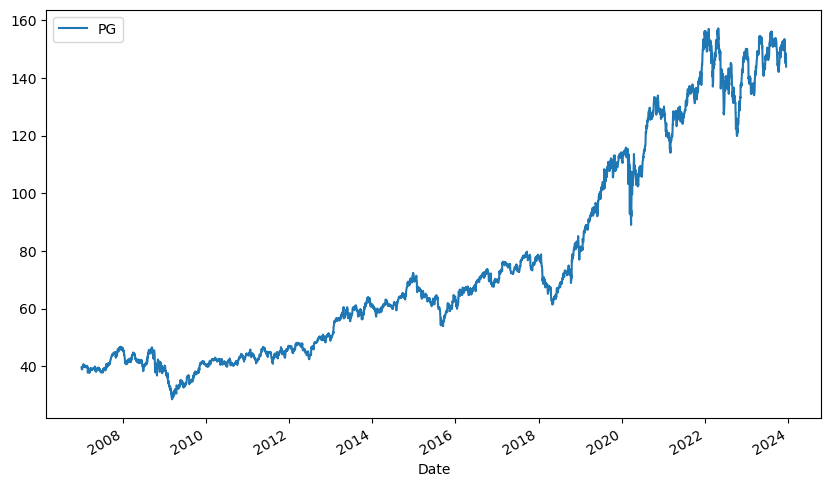

In [6]:
data.plot(figsize=(10, 6))

<AxesSubplot:xlabel='Date'>

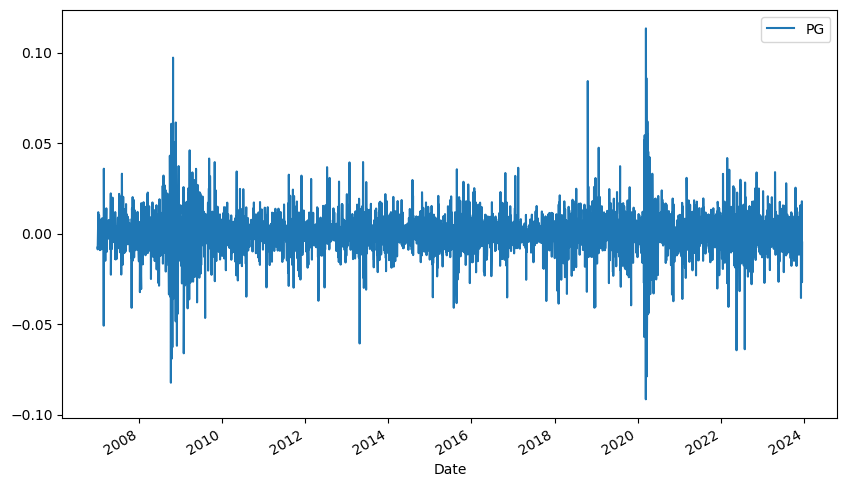

In [7]:
log_returns.plot(figsize = (10, 6))

In [8]:
u  = log_returns.mean()
u

PG    0.000303
dtype: float64

In [9]:
var = log_returns.var()
var

PG    0.000138
dtype: float64

In [10]:
drift = u - (0.5 * var)
drift

PG    0.000234
dtype: float64

In [11]:
stdev = log_returns.std()
stdev

PG    0.011735
dtype: float64

In [17]:
type(drift)

pandas.core.series.Series

In [18]:
type(stdev)

pandas.core.series.Series

In [19]:
np.array(drift)

array([0.00023369])

In [20]:
drift.values

array([0.00023369])

In [21]:
stdev.values

array([0.01173501])

In [12]:
norm.ppf(0.95)

1.6448536269514722

In [13]:
x = np.random.rand(10,2)
x

array([[0.42989074, 0.35911366],
       [0.68625413, 0.01319057],
       [0.86714216, 0.95850887],
       [0.23185268, 0.90430534],
       [0.62875757, 0.77129534],
       [0.93594819, 0.82086597],
       [0.91895185, 0.29833574],
       [0.10818513, 0.8047244 ],
       [0.70930648, 0.11192207],
       [0.47217433, 0.65425361]])

In [14]:
norm.ppf(x)

array([[-0.17665234, -0.36082895],
       [ 0.48526025, -2.22055459],
       [ 1.1129831 ,  1.73363841],
       [-0.73275911,  1.30648019],
       [ 0.32856452,  0.74311954],
       [ 1.52162281,  0.91867029],
       [ 1.39805581, -0.52919313],
       [-1.2362376 ,  0.85861821],
       [ 0.55135981, -1.21636964],
       [-0.06980525,  0.39683006]])

In [15]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[ 0.17124725,  1.4165705 ],
       [ 2.64185893,  1.79882406],
       [-0.48468439,  1.81630704],
       [-0.90863193,  0.03995727],
       [ 0.04045276,  1.54367227],
       [ 0.99425974, -0.87794929],
       [-0.82738637,  2.3078742 ],
       [ 1.02857762,  1.24912688],
       [ 0.94688185, -0.23783278],
       [ 0.30872619, -0.54582824]])

In [16]:
t_intervals = 1000
iterations = 10

# np.exp indicates Eulers e expression and object.values transfer the object into a numpy array

In [22]:
daily_returns = np.exp(drift.values + stdev.values * norm.pdf (np.random.rand (t_intervals, iterations)))
daily_returns

array([[1.00449025, 1.00318536, 1.00462494, ..., 1.0047718 , 1.00415403,
        1.0034108 ],
       [1.00426607, 1.0035235 , 1.00470389, ..., 1.00467409, 1.00400282,
        1.00443007],
       [1.00485102, 1.00386239, 1.00351514, ..., 1.00492733, 1.00420098,
        1.00478291],
       ...,
       [1.0034674 , 1.0046355 , 1.00311766, ..., 1.0049029 , 1.00480668,
        1.00448349],
       [1.00480099, 1.00484739, 1.00348734, ..., 1.00351238, 1.00431717,
        1.00386447],
       [1.00421205, 1.00343161, 1.00482326, ..., 1.00343797, 1.00400561,
        1.00468797]])

# The first stock price in our list must be the last one in our data set

In [23]:
S0 = data.iloc[-1]
S0

PG    143.960007
Name: 2023-12-15 00:00:00, dtype: float64

# We will obtain an array of 1000 by ten elements, just like the dimension of daily returns and then fill it with zeros

In [26]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Now we can replace the zeros with the expected stock prices by using a loop

In [28]:
price_list[0] = S0
price_list

array([[143.96000671, 143.96000671, 143.96000671, ..., 143.96000671,
        143.96000671, 143.96000671],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

# We must set up a loop that begins in day one and ends at day 1000

In [30]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t-1] * daily_returns[t]

In [31]:
price_list

array([[  143.96000671,   143.96000671,   143.96000671, ...,
          143.96000671,   143.96000671,   143.96000671],
       [  144.57415072,   144.46724998,   144.63717859, ...,
          144.63288895,   144.5362525 ,   144.59775934],
       [  145.27548265,   145.02523896,   145.1455992 , ...,
          145.34554262,   145.1434461 ,   145.28935805],
       ...,
       [ 9752.22944052, 10029.32395831,  9770.10601734, ...,
         9565.98154891,  9910.62825457,  9655.03369272],
       [ 9799.04977361, 10077.94000314,  9804.17765538, ...,
         9599.58091178,  9953.41413468,  9692.34529337],
       [ 9840.32384129, 10112.5235329 ,  9851.46577191, ...,
         9632.58401545,  9993.28361738,  9737.78270147]])

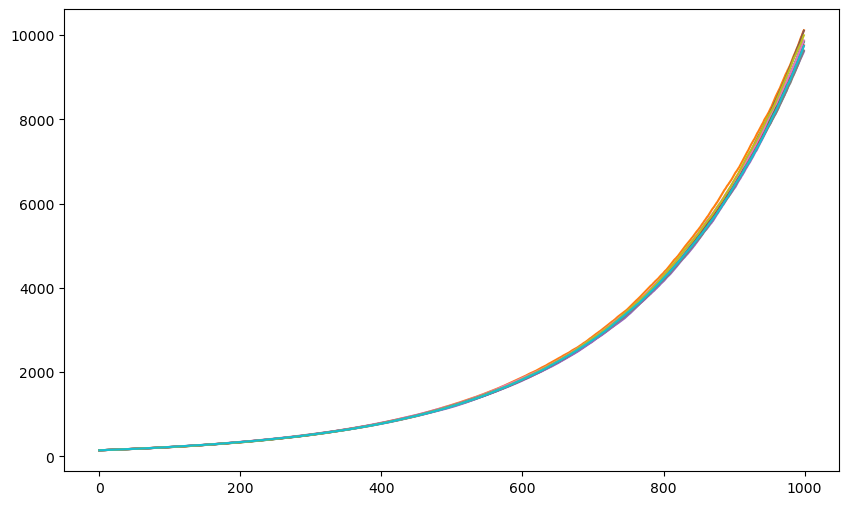

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(price_list)
plt.show()